## 워드 임베딩

In [1]:
# 처리해야 할 문장을 파이썬 리스트에 옮겨담았습니다.
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개 봅니다.
word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


### 간단한 사전 만들기

In [2]:
index_to_word = {}

# 단어를 하나씩 채움 / 순서는 중요치 않음 (임의적으로 채움)
# <BOS> <PAD> <UNK>는 관례적으로 맨 앞에 넣어줌
index_to_word[0] = '<PAD>' # 패딩용 단어
index_to_word[1] = '<BOS>' # 문장의 시작지점
index_to_word[2] = '<UNK>' # 사전에 없는(Unknown) 단어
index_to_word[3] = 'i'
index_to_word[4] = 'feel'
index_to_word[5] = 'hungry'
index_to_word[6] = 'eat'
index_to_word[7] = 'lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)


{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


### 단어 -> index로 변환하는 사전

In [3]:
word_to_index = {word:index for index,word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [4]:
print(word_to_index['feel'])

4


### 워드 임베딩하는 함수 (단어 -> 인덱스)

In [5]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수를 만들어 봅시다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']] + [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

print(get_encoded_sentence(sentences[1], word_to_index))

[1, 3, 6, 7]


In [6]:
# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다. 
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


### 임베딩된 데이터를 디코딩하는 함수 (인덱스 -> 단어)

In [7]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    # [1:]를 통해 <BOS>를 제외
    return ' '.join([index_to_word[i] if i in index_to_word else '<UNK>' for i in encoded_sentence[1:]])

print(get_decoded_sentence(encoded_sentences[0], index_to_word))

i feel hungry


In [8]:
# 여러개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# encoded_sentences=[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 가 아래와 같이 변환됩니다.
print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


## 임베딩 레이어

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

vocab_size = len(word_to_index) # 단어->인덱스 변환 dict(), len=10
word_vector_dim = 4 # 4차원 워드벡터를 만들 예정

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# 숫자로 변환된 텍스트 데이터 [[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 에 Embedding 레이어를 적용합니다. 
# list 형태의 sentences는 numpy array로 변환되어야 딥러닝 레이어의 입력이 될 수 있습니다.

raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index))
print(raw_inputs)
# inputs 길이가 4, 4, 5로 안맞으므로, 벡터 뒤에 PADDING을 넣어줘야함
raw_inputs = keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
output = embedding(raw_inputs)
print(output)
print(raw_inputs)

[list([1, 3, 4, 5]) list([1, 3, 6, 7]) list([1, 8, 3, 4, 9])]
tf.Tensor(
[[[ 0.03508003 -0.02779454  0.01927438 -0.03799442]
  [-0.03493961  0.0352709   0.00901802 -0.03208896]
  [ 0.02145391  0.01827606 -0.00531596  0.04793683]
  [-0.00352221  0.0026083  -0.04902512 -0.04734998]
  [ 0.03222298  0.01345911  0.00083692  0.02097995]]

 [[ 0.03508003 -0.02779454  0.01927438 -0.03799442]
  [-0.03493961  0.0352709   0.00901802 -0.03208896]
  [ 0.03431574  0.03713374  0.00587662 -0.03785485]
  [ 0.02475501  0.01369863 -0.02716534 -0.00993086]
  [ 0.03222298  0.01345911  0.00083692  0.02097995]]

 [[ 0.03508003 -0.02779454  0.01927438 -0.03799442]
  [ 0.00860394 -0.01189981  0.00104355  0.04844805]
  [-0.03493961  0.0352709   0.00901802 -0.03208896]
  [ 0.02145391  0.01827606 -0.00531596  0.04793683]
  [-0.02784665 -0.01868136 -0.02213362  0.02596934]]], shape=(3, 5, 4), dtype=float32)
[[1 3 4 5 0]
 [1 3 6 7 0]
 [1 8 3 4 9]]


## 모델 활용

### RNN

In [10]:
vocab_size = 10     # 어휘 사전의 크기(10개 단어) 
word_vector_dim = 4 # 어휘당 학습하고자 하는 속성(워드 벡터의 차원 수 4개)

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(8))  # 가장 널리 쓰이는 RNN인 LSTM 모델, LSTM 벡터의 차원수 = 8
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid')) # 긍/부정을 나타내는 1dim

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 416       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


### 1D CNN

In [11]:
vocab_size = 10     # 어휘 사전의 크기(10개 단어) 
word_vector_dim = 4 # 어휘당 학습하고자 하는 속성(워드 벡터의 차원 수 4개)

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.Conv1D(16, 7, activation='relu', use_bias=False))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 7, activation='relu', use_bias=False))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu', use_bias=False))
model.add(keras.layers.Dense(1, activation='sigmoid', use_bias=False)) # 최종 출력 = 긍/부정 = 1dim

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          448       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1792      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

### Global_max_pooling

In [12]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 어휘 사전의 크기입니다(10개의 단어)

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


## IMDB 영화리뷰 감성분석
- 25000, 25000 테스트 데이터
- 긍정 1, 부정  0

### 데이터셋 분석

In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)
imdb = keras.datasets.imdb

# IMDB 다운로드
# num_words = 10000 : 10000개만큼 word_to_index 까지 생성된 형태로 데이터셋 생성
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("train samples : {}, test samples : {}".format(len(x_train), len(x_test)))

2.2.0
train samples : 25000, test samples : 25000


In [14]:
for i in range(2):
    print('{}번째 리뷰데이터'.format(i+1))
    print('{}\n'
          '레이블 : {}\n'
         '리뷰 문장 길이 : {}'.format(x_train[i], y_train[i], len(x_train[i]))
         , end='\n\n')

1번째 리뷰데이터
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
레이블 : 1
리뷰 문장 길이 : 218

2번째 리뷰데이터
[1, 194, 1153, 1

In [15]:
word_to_index = imdb.get_word_index()
index_to_word = {index: word for word, index in word_to_index.items()}
print(index_to_word[1])
print(word_to_index['the'])

the
1


In [16]:
# 실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다. 
word_to_index = {k:v+3 for k, v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_to_index['<PAD>'] = 0
word_to_index['<BOS>'] = 1
word_to_index['<UNK>'] = 2 # unknown
word_to_index['<UNUSED'] = 3

# 이거 안해도됨
# index_to_word[0] = '<PAD>'
# index_to_word[1] = '<BOS>'
# index_to_word[2] = '<UNK>'
# index_to_word[3] = '<UNUSED>'

index_to_word = {index :word for word, index in word_to_index.items()}

print(index_to_word[1])
print(word_to_index['the'])
print(index_to_word[4])

<BOS>
4
the


In [17]:
print(get_decoded_sentence(x_train[0], index_to_word))
print('레이블 : ', y_train[0])  # 1번째 리뷰데이터 레이블

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

In [18]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차 계산
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대: ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를 들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,
max_tokens = np.mean(num_tokens) + 2*np.std(num_tokens)
maxlen = int(max_tokens)
print('fpad_sequences_maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 이내에 포함됨'.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  234.75892
문장길이 최대:  2494
문장길이 표준편차 :  172.91149458735703
fpad_sequences_maxlen :  580
전체 문장의 0.94536%가 maxlen 이내에 포함됨


- 다른 방식의 padding : pre, post 둘 중 하나 가능

In [19]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, 
                                                    value=word_to_index['<PAD>'],
                                                    padding='post',
                                                    maxlen=maxlen)

x_test = keras.preprocessing.sequence.pad_sequences(x_test,
                                                   value=word_to_index['<PAD>'],
                                                   padding='post',
                                                   maxlen=maxlen)

print(x_train.shape)

(25000, 580)


### 딥러닝 모델 설계, 훈련

In [20]:
vocab_size = 10000 # 어휘 사전 크기
word_vector_dim = 16 # 워드 벡터 차원수

In [21]:
def Global():
    model = keras.Sequential()
    model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
    model.add(keras.layers.GlobalMaxPooling1D())
    model.add(keras.layers.Dense(4096))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(1024))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

    model.summary()
    return model

In [22]:
def Cnn():
    model = keras.Sequential()
    model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
    model.add(keras.layers.Conv1D(32, 7, activation='relu'))
    model.add(keras.layers.MaxPooling1D(5))
    model.add(keras.layers.Conv1D(32, 7, activation='relu'))
    model.add(keras.layers.GlobalMaxPooling1D())
    model.add(keras.layers.Dense(4096))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(1, activation='sigmoid')) # 최종 출력 = 긍/부정 = 1dim

    model.summary()
    return model

In [23]:
def Rnn():
    model = keras.Sequential()
    model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
    model.add(keras.layers.LSTM(16))  # 가장 널리 쓰이는 RNN인 LSTM 모델, LSTM 벡터의 차원수 = 8
    model.add(keras.layers.Dense(4096))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(1, activation='sigmoid')) # 긍/부정을 나타내는 1dim

    model.summary()
    return model

In [24]:
# model 설계
model_select = {'global': Global, 'cnn': Cnn, 'rnn': Rnn}

model = model_select['cnn']()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          3616      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4096)              135168    
_________________________________________________________________
dropout (Dropout)            (None, 4096)             

In [25]:
x_val = x_train[:10000]
y_val = y_train[:10000]

# validation 제외한 나머지
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


In [26]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

epochs = 20

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=epochs,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   verbose=1)

Epoch 1/20
30/30 [==============================] - 8s 253ms/step - loss: 0.6934 - accuracy: 0.5038 - val_loss: 0.6929 - val_accuracy: 0.4974
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6732 - accuracy: 0.5966 - val_loss: 0.5772 - val_accuracy: 0.7323
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3934 - accuracy: 0.8325 - val_loss: 0.3231 - val_accuracy: 0.8651
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2095 - accuracy: 0.9192 - val_loss: 0.3141 - val_accuracy: 0.8690
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1181 - accuracy: 0.9620 - val_loss: 0.3528 - val_accuracy: 0.8716
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0646 - accuracy: 0.9837 - val_loss: 0.4064 - val_accuracy: 0.8685
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0294 - accuracy: 0.9953 - val_loss: 0.5044 - val_accuracy: 0.8657
Epoch 8/20
3

In [27]:
results = model.evaluate(x_test, y_test, verbose=2)

print(results)

782/782 - 3s - loss: 0.9558 - accuracy: 0.8478
[0.9558389782905579, 0.8478000164031982]


In [28]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


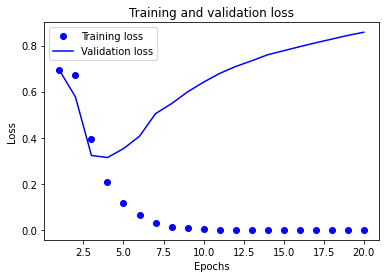

In [29]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# 'bo'는 파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 파란 실선
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

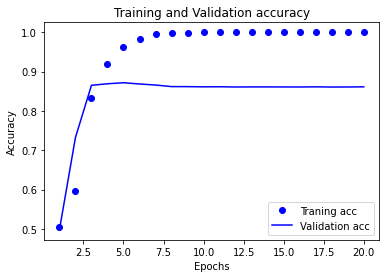

In [30]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Traning acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 워드 임베딩

In [31]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [32]:
import os

# 학습한 embedding 파라미터 > 파일에 저장
word2vec_file_path = '/home/aiffel0049/aiffel/Exploration/9.sentimental_analysis/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim)) # 몇개 벡터를 얼마 사이즈로 기재할지 타이틀 작성

# 단어 개수(에서 4개 제외)만큼의 워드 벡터를 파일에 기록
vectors = model.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [33]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

array([-0.03093542,  0.01461959, -0.02924525,  0.03354142,  0.02887502,
       -0.00594641, -0.01231226,  0.0049962 , -0.04515434, -0.01782604,
        0.00051902, -0.05382626, -0.00673995,  0.04378683,  0.04239551,
        0.05461605], dtype=float32)

In [34]:
word_vectors.similar_by_word('love')

[('vision', 0.8693547248840332),
 ('cheering', 0.839249849319458),
 ('rates', 0.8224093317985535),
 ('luck', 0.7935540676116943),
 ('fuller', 0.779646635055542),
 ('awe', 0.775079071521759),
 ('artistically', 0.7737942337989807),
 ('glorious', 0.768541693687439),
 ('presentation', 0.7660696506500244),
 ('liberties', 0.7630019187927246)]

In [35]:
from gensim.models import KeyedVectors
word2vec_path = '/home/aiffel0049/aiffel/Exploration/9.sentimental_analysis/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)
vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [36]:
import numpy as np
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [37]:
from tensorflow.keras.initializers import Constant
from tensorflow import keras

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수 (변경가능한 하이퍼파라미터)

# 모델 구성
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 580, 300)          3000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 574, 16)           33616     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 114, 16)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 108, 16)           1808      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [38]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 24s 807ms/step - loss: 0.6937 - accuracy: 0.5118 - val_loss: 0.6923 - val_accuracy: 0.5267
Epoch 2/20
30/30 [==============================] - 7s 218ms/step - loss: 0.6803 - accuracy: 0.5661 - val_loss: 0.6675 - val_accuracy: 0.5950
Epoch 3/20
30/30 [==============================] - 7s 217ms/step - loss: 0.6242 - accuracy: 0.6590 - val_loss: 0.5843 - val_accuracy: 0.7100
Epoch 4/20
30/30 [==============================] - 6s 211ms/step - loss: 0.4848 - accuracy: 0.7854 - val_loss: 0.4280 - val_accuracy: 0.8129
Epoch 5/20
30/30 [==============================] - 6s 211ms/step - loss: 0.3303 - accuracy: 0.8678 - val_loss: 0.3431 - val_accuracy: 0.8542
Epoch 6/20
30/30 [==============================] - 6s 216ms/step - loss: 0.2320 - accuracy: 0.9136 - val_loss: 0.3183 - val_accuracy: 0.8662
Epoch 7/20
30/30 [==============================] - 7s 221ms/step - loss: 0.1654 - accuracy: 0.9466 - val_loss: 0.3173 - val_accuracy: 0.8670
Epoch

In [39]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 9s - loss: 0.4950 - accuracy: 0.8576
[0.4949917495250702, 0.8575999736785889]
